## No noise

First, we will just experiment with no noise to make sure we construct an accurate simulation of the original results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

m = 5 #Number of columns 
r = 2 #Dimension of U*

U = np.random.normal(0, 1, (m,r)) #Random (true) subspace


#Uncomment the following out for an example true space
#m = 5
#r = 2
#U = np.array([[1,1],[1,2],[1,3],[1,4],[1,5]]) 


print("True space \n", U)

True space 
 [[ 0.7186015   1.96482917]
 [ 2.33841018 -0.53901473]
 [ 0.45188266  0.94488961]
 [-1.2010661   0.2038613 ]
 [ 1.49838616 -0.89541003]]


##### Note:

In our experiments, we will take $W$ to be either of the form:

$$
\begin{matrix}
1 & 1 & ... & 1 \\
1 & 1 & ... & 1 \\
1 & 1 & ... & 1 \\
... & ... & ... & ... \\
1 & 1 & ... & 1 \\
1 & 0 & ... & 0 \\
0 & 1 & ... & 0 \\
... & ... & ... & ... \\
0 & 0 & ... & 1 \\
\end{matrix}
$$

with a block of r 1's in the first r rows and an identity matrix at the bottom, or

$$
\begin{matrix}
1 & 0 & ... & 0 \\
1 & 1 & ... & 0 \\
1 & 1 & ... & 0 \\
... & ... & ... & ... \\
0 & 0 & ... & 1 \\
\end{matrix}
$$

with each column having r+1 $1$s starting from the main diagonal. 


We could choose any $W$ satisfying our assumptions. This was taken because of ease of generalization in the code.

In [2]:
#Define the binary matrix W

W = np.zeros((m,m-r))

#Uncomment for the first type of W matrix

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        if i < r:
            W[i][j] = 1
        else:
            if i-r == j:
                W[i][j] = 1
"""
#Uncomment for the second type of W matrix


for i in range(W.shape[1]):
    temp = 0
    while temp!=r+1:
        W[temp+i][i] = 1
        temp+=1
"""

        
W_T = np.transpose(W)

print("Binary matrix \n", W)

Binary matrix 
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [3]:
#Computing the projections of S onto canonical coordinates

U_proj = np.array(np.hstack(([[U[j,:] for j in range(np.shape(U)[0]) if W_T[i,j] == 1] for i in range(W_T.shape[0])])))

print("Matrix of projections of S onto lower dimensions \n", U_proj)

Matrix of projections of S onto lower dimensions 
 [[ 0.7186015   1.96482917  0.7186015   1.96482917  0.7186015   1.96482917]
 [ 2.33841018 -0.53901473  2.33841018 -0.53901473  2.33841018 -0.53901473]
 [ 0.45188266  0.94488961 -1.2010661   0.2038613   1.49838616 -0.89541003]]


In [4]:
#Computing the nullspaces of the projections

from scipy.linalg import null_space

A_temp = np.array(np.hstack(([[null_space(U_proj.T[i:i+r, :])[j,:] for j in range(U_proj.T.shape[1])] for i in range(0, U_proj.T.shape[0], r)])))

print("Matrix of basis vectors of the nullspace of projections \n", A_temp)


Matrix of basis vectors of the nullspace of projections 
 [[-0.44144095  0.03059086  0.20505188]
 [-0.03758703  0.44921505 -0.57194541]
 [ 0.89650271  0.89289979  0.79424944]]


In [5]:
#Creating the matrix A whose null space will be the true subspace 
#And computing its singular values

A = np.array(W, dtype = float)

for j in range(A.shape[1]):
    c = 0
    for i in range(A.shape[0]):
        if A[i,j] == 1:
            A[i,j] = A_temp[c, j]
            c+=1
print("Matrix whose kernel will be our guess \n", A)

Sig = np.linalg.svd(A)[1]

print("Singular values \n", Sig)

Matrix whose kernel will be our guess 
 [[-0.44144095  0.03059086  0.20505188]
 [-0.03758703  0.44921505 -0.57194541]
 [ 0.89650271  0.          0.        ]
 [ 0.          0.89289979  0.        ]
 [ 0.          0.          0.79424944]]
Singular values 
 [1.11969329 1.00767053 0.85491932]


In [6]:
#Finding kernel space of A

U_test = null_space(A.T)

print("Basis of guessed space \n", U_test)

Basis of guessed space 
 [[-0.46753138 -0.74288062]
 [-0.67455982  0.33796372]
 [-0.25849581 -0.35162735]
 [ 0.35538658 -0.14457729]
 [-0.36505307  0.43516035]]


In [7]:
# Testing for whether the span of ker(A) is the same as column space of U - i.e. the true space
# We test this by looking at the projection matrices 
# Error estimated with the ||P_true - P_test||_F, the frobenius norm of the difference in Projection matrices

P_test = np.dot(U_test,np.dot(np.linalg.inv(np.dot(U_test.T,U_test)), U_test.T))

P_true = np.dot(U,np.dot(np.linalg.inv(np.dot(U.T,U)), U.T))

error = (1/math.sqrt(2))*np.linalg.norm(P_true - P_test, 'fro') 

print ("True projection", P_true)
print ("Guessed projection", P_test)

print ("Error", error)

True projection [[ 0.7704572   0.06431119  0.38207205 -0.05875071 -0.15259842]
 [ 0.06431119  0.56925043  0.0555336  -0.28859139  0.39331855]
 [ 0.38207205  0.0555336   0.19046188 -0.04102861 -0.05864959]
 [-0.05875071 -0.28859139 -0.04102861  0.14720222 -0.19264927]
 [-0.15259842  0.39331855 -0.05864959 -0.19264927  0.32262828]]
Guessed projection [[ 0.7704572   0.06431119  0.38207205 -0.05875071 -0.15259842]
 [ 0.06431119  0.56925043  0.0555336  -0.28859139  0.39331855]
 [ 0.38207205  0.0555336   0.19046188 -0.04102861 -0.05864959]
 [-0.05875071 -0.28859139 -0.04102861  0.14720222 -0.19264927]
 [-0.15259842  0.39331855 -0.05864959 -0.19264927  0.32262828]]
Error 4.79838436196491e-16


## With noise 

Now we will perform the same experiment, but we will add noise into the mix and see how the noise translates through every step.

In [8]:
m = 7 #Number of columns 
r = 3 #Dimension of U*


U = np.random.normal(0, 1, (m,r)) #Random (true) subspace

#Uncomment the following out for an example true space
#m = 5
#r = 2
#U = np.array([[1,1],[1,2],[1,3],[1,4],[1,5]]) 

print("True space \n", U)

True space 
 [[ 0.37859181 -1.16507111  1.21084692]
 [ 1.23800229  1.29355713 -1.13314114]
 [-1.30275734  0.25749553  0.26265243]
 [ 1.85173453 -0.60882289  0.38206855]
 [-0.9165681  -0.03712215  1.5799425 ]
 [ 1.27712421  0.60021687 -0.73697279]
 [-1.44115597 -1.34984424 -0.60161179]]


In [9]:
#Define the binary matrix W

W = np.zeros((m,m-r))

#Uncomment for the first type of W matrix
"""
for i in range(W.shape[1]):
    temp = 0
    while temp!=r+1:
        W[temp+i][i] = 1
        temp+=1
"""

#Uncomment for the second type of W matrix

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        if i < r:
            W[i][j] = 1
        else:
            if i-r == j:
                W[i][j] = 1

        
W_T = np.transpose(W)

print("Binary matrix \n", W)

Binary matrix 
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [10]:
# Computing the projections of S onto canonical coordinates

# No noise Version

U_proj = np.array(np.hstack(([[U[j,:] for j in range(U.shape[0]) if W_T[i,j] == 1] for i in range(W_T.shape[0])])))

# Creating the noisy versions

mu = 0 # mean
sigma = 1e-3 # standard deviation

#Adding noise from a Gaussian distribution

Z_proj = np.random.normal(mu, sigma, (U_proj.shape[0], U_proj.shape[1]))
V_proj = U_proj + Z_proj


print("Projections of U onto lower dimensions w/o noise \n", U_proj)
print("Projections of U onto lower dimensions w/ noise \n", V_proj)

Projections of U onto lower dimensions w/o noise 
 [[ 0.37859181 -1.16507111  1.21084692  0.37859181 -1.16507111  1.21084692
   0.37859181 -1.16507111  1.21084692  0.37859181 -1.16507111  1.21084692]
 [ 1.23800229  1.29355713 -1.13314114  1.23800229  1.29355713 -1.13314114
   1.23800229  1.29355713 -1.13314114  1.23800229  1.29355713 -1.13314114]
 [-1.30275734  0.25749553  0.26265243 -1.30275734  0.25749553  0.26265243
  -1.30275734  0.25749553  0.26265243 -1.30275734  0.25749553  0.26265243]
 [ 1.85173453 -0.60882289  0.38206855 -0.9165681  -0.03712215  1.5799425
   1.27712421  0.60021687 -0.73697279 -1.44115597 -1.34984424 -0.60161179]]
Projections of U onto lower dimensions w/ noise 
 [[ 0.3786728  -1.16525101  1.21105343  0.37804409 -1.16516422  1.21176346
   0.37837487 -1.16448206  1.21071622  0.37837503 -1.16486111  1.2123545 ]
 [ 1.23959054  1.29225143 -1.13257592  1.23874508  1.29445071 -1.13167386
   1.23824863  1.29299528 -1.13194954  1.23839297  1.29378224 -1.132063  ]
 [-1.

In [11]:
# Finding the spectral norm of the largest noise matrix to get epsilon

epsilon = 0

for j in range(0, Z_proj.shape[1], r):
    lam = np.amax(np.linalg.svd(Z_proj[:, j:j+r])[1])
    epsilon = np.amax([epsilon, lam])
print("epsilon", epsilon)

epsilon 0.0036548804668457605


In [12]:
# Computing the nullspaces of the projections

# No noise version

A_temp = np.array(np.hstack(([[null_space(U_proj.T[i:i+r, :])[j,:] for j in range(U_proj.T.shape[1])] for i in range(0, U_proj.T.shape[0], r)])))


# Noisy version

B_temp = np.array(np.hstack(([[null_space(V_proj.T[i:i+r, :])[j,:] for j in range(V_proj.T.shape[1])] for i in range(0, V_proj.T.shape[0], r)])))




print("Basis vectors of the nullspace of projections w/o noise \n", A_temp)
print("Basis vectors of the nullspace of projections w/ noise \n", B_temp)

Basis vectors of the nullspace of projections w/o noise 
 [[-0.58084705 -0.55367453 -0.01261774  0.56013818]
 [-0.31328414 -0.35152006 -0.45969563  0.6118649 ]
 [ 0.41946434 -0.69772098  0.35668714  0.5205632 ]
 [ 0.62331325  0.28820756  0.81320047  0.20218932]]
Basis vectors of the nullspace of projections w/ noise 
 [[-0.57868028 -0.55395083 -0.01209857  0.55998155]
 [-0.31155229 -0.35162209 -0.45975826  0.61203375]
 [ 0.42252068 -0.69737247  0.35648209  0.52032798]
 [ 0.62413186  0.2883956   0.81326286  0.20271689]]


In [13]:
#Creating the matrix A whose null space will be the true subspace

# No noise version

A = np.array(W, dtype = float) 

for j in range(A.shape[1]): 
    c = 0
    for i in range(A.shape[0]):
        if A[i,j] == 1:
            A[i,j] = A_temp[c, j]
            c+=1
            
# Noisy version
            
B = np.array(W, dtype = float) 

for j in range(B.shape[1]):
    c = 0
    for i in range(B.shape[0]):
        if B[i,j] == 1:
            B[i,j] = B_temp[c, j]
            c+=1       

            
print("Matrix whose kernel will be our guess w/o noise \n", A)
print("Matrix whose kernel will be our guess w/ noise \n", B)

Matrix whose kernel will be our guess w/o noise 
 [[-0.58084705 -0.55367453 -0.01261774  0.56013818]
 [-0.31328414 -0.35152006 -0.45969563  0.6118649 ]
 [ 0.41946434 -0.69772098  0.35668714  0.5205632 ]
 [ 0.62331325  0.          0.          0.        ]
 [ 0.          0.28820756  0.          0.        ]
 [ 0.          0.          0.81320047  0.        ]
 [ 0.          0.          0.          0.20218932]]
Matrix whose kernel will be our guess w/ noise 
 [[-0.57868028 -0.55395083 -0.01209857  0.55998155]
 [-0.31155229 -0.35162209 -0.45975826  0.61203375]
 [ 0.42252068 -0.69737247  0.35648209  0.52032798]
 [ 0.62413186  0.          0.          0.        ]
 [ 0.          0.2883956   0.          0.        ]
 [ 0.          0.          0.81326286  0.        ]
 [ 0.          0.          0.          0.20271689]]


In [14]:
#Computing the singular values of the projected S matrix, noisy projected S matrix, and noisy A matrix.

Sig_V_proj = np.array(np.hstack(([np.amin(np.linalg.svd(V_proj.T[i:i+r, :])[1]) for i in range(0, V_proj.T.shape[0], r)])))
Sig_B = np.amin(np.linalg.svd(B)[1])

delta = np.amin(Sig_V_proj)

print("Min Kernel Matrix Singular Value", Sig_B)
print("Sum of Data Singular Values", delta)

Min Kernel Matrix Singular Value 0.2947989881448046
Sum of Data Singular Values 0.31668576460709524


In [15]:
#Finding kernel space of A

U_test = null_space(A.T) # No noise
V_test = null_space(B.T) # With noise

print("Basis of guessed space w/o noise \n", U_test)
print("Basis of guessed space w/ noise \n", V_test)

Basis of guessed space w/o noise 
 [[-0.33790661 -0.48423599 -0.27124164]
 [ 0.05242906  0.60149245 -0.12892603]
 [ 0.43363197 -0.10274755  0.14515798]
 [-0.58035028 -0.07978343 -0.41524704]
 [ 0.46457388 -0.44537899 -0.32691684]
 [-0.16580556  0.3775726  -0.14075887]
 [-0.33897907 -0.21418769  0.7678655 ]]
Basis of guessed space w/ noise 
 [[-0.33714126 -0.48457282 -0.27190288]
 [ 0.05210953  0.60142581 -0.12928866]
 [ 0.43378031 -0.10234083  0.14581499]
 [-0.58023525 -0.07978446 -0.41535271]
 [ 0.464881   -0.44496032 -0.32730811]
 [-0.16569803  0.37765222 -0.14105107]
 [-0.33942876 -0.21453691  0.76716842]]


In [16]:
# Testing for whether the span of ker(A) is the same as column space of S - i.e. the true space
# We test this by looking at the projection matrices 
# Error estimated with the ||P_true - P_test||_F, the frobenius norm of the difference in Projection matrices

P_test = np.dot(U_test,np.dot(np.linalg.inv(np.dot(U_test.T,U_test)), U_test.T))
P_test_noise = np.dot(V_test,np.dot(np.linalg.inv(np.dot(V_test.T,V_test)), V_test.T))
P_true = np.dot(U,np.dot(np.linalg.inv(np.dot(U.T,U)), U.T))

error = (1/math.sqrt(2))*np.linalg.norm(P_true - P_test, 'fro') 
error_noise = (1/math.sqrt(2))*np.linalg.norm(P_true - P_test_noise, 'fro') 

bound = epsilon*math.sqrt(2*r*(m-r))/(Sig_B*delta)

#print ("True projection", P_true)
#print ("Guessed projection w/o noise", P_test)
#print ("Guessed projection w/ noise", P_test_noise)

print ("Error w/o noise", error)
print ("Error w/ noise", error_noise)
print ("Estimated bound", bound)

Error w/o noise 5.131439886769294e-16
Error w/ noise 0.001295761349512937
Estimated bound 0.19178925336124047


## Experiments

In [17]:
def Errors(m_, r_, U_, W_, sigma_):
    
    ##############################################################################################

    # Step 0.0: Computing the projections of S onto canonical coordinates and adding noise

    # No noise Version

    U_proj = np.array(np.hstack(([[U_[j,:] for j in range(U_.shape[0]) if W_.T[i,j] == 1] for i in range(W_.T.shape[0])])))


    # Creating the noisy versions
    
    rows_proj = U_proj.shape[0]
    cols_proj = U_proj.shape[1]

    #Adding noise from a Gaussian distribution to projection (Option 1)
    
    Z_proj = np.random.normal(0, sigma_, (rows_proj,cols_proj))
    V_proj = U_proj + Z_proj
    
    ##############################################################################################
    
    # Step 0.1: computing epsilon by computing the largest spectral norm of all the noise matrices
    
    
    # Finding the spectral norm of the largest noise matrix to get epsilon

    epsilon = 0

    for j in range(0, Z_proj.shape[1], r):
        lam = np.amax(np.linalg.svd(Z_proj[:, j:j+r])[1])
        epsilon = np.amax([epsilon, lam])
        
    
    ##############################################################################################


    # Step 1: Computing the nullspaces of the projections

    # No noise version

    A_temp = np.array(np.hstack(([[null_space(U_proj.T[i:i+r_, :])[j,:] for j in range(U_proj.T.shape[1])] for i in range(0, U_proj.T.shape[0], r_)])))


    # Noisy version

    B_temp = np.array(np.hstack(([[null_space(V_proj.T[i:i+r_, :])[j,:] for j in range(V_proj.T.shape[1])] for i in range(0, V_proj.T.shape[0], r_)])))

    
    #We could also add noise from a Gaussian distribution to these nullspaces instead of the projected 
    #coordinates (Option 2)
    #Uncomment the following line for that: 
    
    #A_temp_noise = A_temp + np.random.normal(0, sigma, (A_temp.shape[0],A_temp.shape[1]))*lam_
    
    ##############################################################################################
     
    
    #Step 2: Creating the matrix A whose null space will be the true subspace

    # No noise version

    A_ = np.array(W_, dtype = float) 

    for j in range(A_.shape[1]):
        c = 0
        for i in range(A_.shape[0]):
            if A_[i,j] == 1:
                A_[i,j] = A_temp[c, j]
                c+=1

    # Noisy version

    B_ = np.array(W_, dtype = float) 

    for j in range(B_.shape[1]):
        c = 0
        for i in range(B_.shape[0]):
            if B_[i,j] == 1:
                B_[i,j] = B_temp[c, j]
                c+=1       

    error_A = np.linalg.norm(A_-B_, 'fro')
    
    ##############################################################################################
    
    
    #Step 3: Finding kernel space of A

    U_test = null_space(A_.T) # No noise
    V_test = null_space(B_.T) # With noise

    
    error_U_test = np.linalg.norm(U_test - V_test, 'fro')
    
    ##############################################################################################
    
    #Final Step: Testing for whether the span of ker(A) is the same as column space of S - i.e. the true space
    # We test this by looking at the projection matrices 
    # Error estimated with the ||Proj_true - Proj_test||_F, the frobenius norm of the difference in Projection matrices

    Proj_test = np.dot(U_test,np.dot(np.linalg.inv(np.dot(U_test.T,U_test)), U_test.T))
    Proj_test_noise = np.dot(V_test,np.dot(np.linalg.inv(np.dot(V_test.T,V_test)), V_test.T))
    Proj_true = np.dot(U_,np.dot(np.linalg.inv(np.dot(U_.T,U_)), U_.T))

    error_noiseless_test = (1/math.sqrt(2))*np.linalg.norm(Proj_true - Proj_test, 'fro') 
    error_noisy_test = (1/math.sqrt(2))*np.linalg.norm(Proj_true - Proj_test_noise, 'fro') 
    
    
    ##############################################################################################
    
    #Computing the singular values of the projected U matrix, noisy projected U matrix, and noisy A matrix.

    Sig_V_proj = np.array(np.hstack(([np.amin(np.linalg.svd(V_proj.T[i:i+r, :])[1]) for i in range(0, V_proj.T.shape[0], r)])))
    Sig_B = np.amin(np.linalg.svd(B_)[1])

    delta = np.amin(Sig_V_proj)
    
    bound = epsilon*math.sqrt(2*r*(m-r))/(Sig_B*delta)
    
    return error_A, error_U_test, error_noiseless_test, error_noisy_test, bound, delta, Sig_B
             


## Effect of Noise: Increasing noise level, keeping dimensions constant

In [47]:
m = 10 #Number of columns 
r = 7 #Dimension of U

#U = np.random.rand(m,r) #Random (true) subspace
U = np.random.normal(0, 1, (m,r))
#U = np.array([[1,1],[1,2],[1,3],[1,4],[1,5]]) #Uncomment the left out for an example true space

W = np.zeros((m,m-r))

#Uncomment for the first type of W matrix
"""
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        if i < r:
            W[i][j] = 1
        else:
            if i-r == j:
                W[i][j] = 1
"""
#Uncomment for the second type of W matrix


for i in range(W.shape[1]):
    temp = 0
    while temp!=r+1:
        W[temp+i][i] = 1
        temp+=1


print("Binary matrix \n", W)

low_b = 1e-8 #Lower bound of noise
upper_b = 1e-2 #Upper bound of noise
num = 1000 # Number of experiments

sigma_vec = np.logspace(-8,-2,num)

Binary matrix 
 [[1. 0. 0.]
 [1. 1. 0.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [0. 1. 1.]
 [0. 0. 1.]]


In [48]:
err_A = np.empty(num, dtype = float) #Stores error in kernel spaces for each experiment (no noise vs noise)
err_U_test = np.empty(num, dtype = float) #Stores error in kernel spaces of A, i.e. errors in 'guesses' (no noise vs noise)
err_noiseless_test = np.empty(num, dtype = float) #Stores error in the difference between true projection and no noise guess
err_noisy_test = np.empty(num, dtype = float) # Stores error in difference between true projection and noise guess
bounds = np.empty(num, dtype = float) #Stores the error bounds for each experiment
delta_vec = np.empty(num, dtype = float) #Stores the values of delta (i.e. sum of (singular values)^{-2})
Sig_B_vec = np.empty(num, dtype = float) #Stores the singular values of B for each experiment

c = 0

for sigma in sigma_vec:
    err_A[c], err_U_test[c], err_noiseless_test[c], err_noisy_test[c], bounds[c], delta_vec[c], Sig_B_vec[c] = Errors(m,r,U,W,sigma)
    c+=1


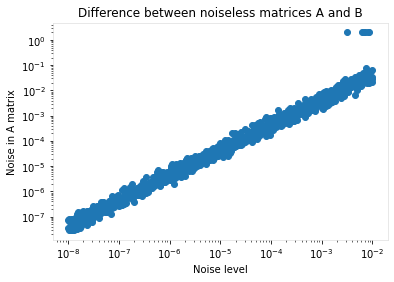

In [49]:
plt.scatter(sigma_vec,err_A)
plt.title("Difference between noiseless matrices A and B")
plt.xlabel("Noise level")
plt.ylabel("Noise in A matrix")
plt.xscale('log')
plt.yscale('log')
plt.show()

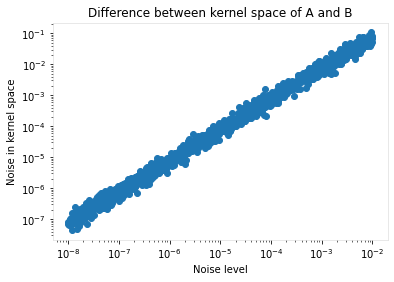

In [50]:
plt.scatter(sigma_vec, err_U_test)
plt.title("Difference between kernel space of A and B")
plt.xlabel("Noise level")
plt.ylabel("Noise in kernel space")
plt.xscale('log')
plt.yscale('log')
plt.show()

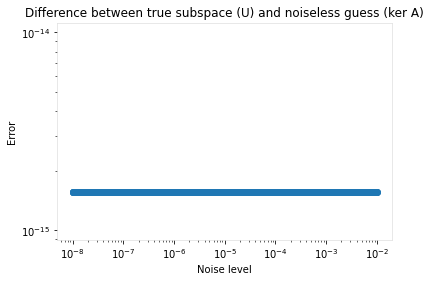

In [51]:
plt.scatter(sigma_vec, err_noiseless_test)
plt.title("Difference between true subspace (U) and noiseless guess (ker A)")
plt.xlabel("Noise level")
plt.ylabel("Error")
plt.xscale('log')
plt.yscale('log')
plt.show()

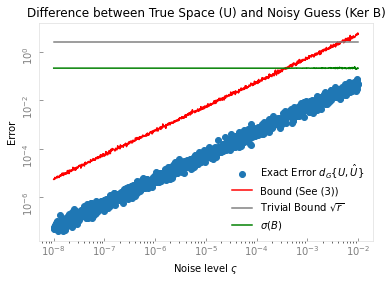

In [52]:
fig = plt.figure()

ax = fig.add_subplot()

# Creating Title

plt.title("Difference between True Space (U) and Noisy Guess (Ker B)")

# Adjusting ticks

ax.tick_params(direction="in")
plt.yticks(rotation=90)
ax.tick_params(axis='x',direction="in", colors='gray')    #setting up X-axis tick color to red
ax.tick_params(axis='y',direction="in", colors='gray')

# Plotting Data

plt.scatter(sigma_vec, err_noisy_test, label = r'Exact Error $d_G\{U, \hat{U}\}$')
plt.plot(sigma_vec,bounds,color = 'red', label = 'Bound (See (3))')
plt.plot(sigma_vec,Sig_B_vec, color = 'green', label = r'$\sigma(B)$')
plt.plot(sigma_vec,np.full((num,),np.sqrt(r),dtype = float), color = 'grey', label = r'Trivial Bound $\sqrt{r}$')

# Labeling and Scaling Axes

plt.xlabel(r'Noise level $\varsigma$')
plt.ylabel("Error")
plt.xscale('log')
plt.yscale('log')


# Making Legend

# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()
# specify order
order = [3, 0, 2, 1]
  
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order], frameon = False)

#Adjusting Boarders

plt.rcParams["axes.edgecolor"] = "lightgray"  #Border color
plt.rcParams["axes.linewidth"] = 0.50      #Border Width

# Saving Figure
#plt.savefig('Noise_Sampling2_Low_Dim.eps', format='eps')



plt.show()

## Experiment 2: Increasing ambient dimension m, keeping noise level and subspace dimension constant

In [24]:
lower_dim = 10
upper_dim = 200
num_tests = 100 #Number of tests per dimension
increment = 10 #Increment of dimension (Make sure it divides upper_dim - nower_dim)
num = np.int((upper_dim-lower_dim)/increment)*num_tests

r = 7 #Dimension of U
sigma = 1e-5 #Noise level / standard deviation of noise

m_vec = np.empty(num, dtype = 'int')
c=0
for i in range(lower_dim,upper_dim,increment):
    for j in range(0,num_tests):
        m_vec[c] = i
        c+=1

In [25]:
err_A = np.empty(num, dtype = float) #Stores error in kernel spaces for each experiment (no noise vs noise)
err_U_test = np.empty(num, dtype = float) #Stores error in kernel spaces of A, i.e. errors in 'guesses' (no noise vs noise)
err_noiseless_test = np.empty(num, dtype = float) #Stores error in the difference between true projection and no noise guess
err_noisy_test = np.empty(num, dtype = float) # Stores error in difference between true projection and noise guess
bounds = np.empty(num, dtype = float) #Stores the error bounds for each experiment (Old)
delta_vec = np.empty(num, dtype = float) #Stores the values of delta (i.e. min singular value of projection)
Sig_B_vec = np.empty(num, dtype = float) #Stores the singular values of B for each experiment

c = 0

for m_ in m_vec:
    
    U = np.random.normal(0, 1, (m_,r))
    
    W = np.zeros((m_,m_-r))

    #Uncomment for the first type of W matrix
    """
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            if i < r:
                W[i][j] = 1
            else:
                if i-r == j:
                    W[i][j] = 1
    """
    #Uncomment for the second type of W matrix
    
    for i in range(W.shape[1]):
        temp = 0
        while temp!=r+1:
            W[temp+i][i] = 1
            temp+=1
    
    

    
    err_A[c], err_U_test[c], err_noiseless_test[c], err_noisy_test[c], bounds[c], delta_vec[c], Sig_B_vec[c] = Errors(m_,r,U,W,sigma)
    
    c+=1

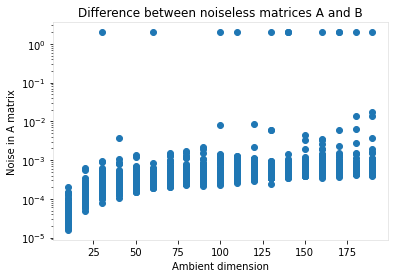

In [26]:
plt.scatter(m_vec,err_A)
plt.title("Difference between noiseless matrices A and B")
plt.xlabel("Ambient dimension")
plt.ylabel("Noise in A matrix")
plt.yscale('log')
plt.show()

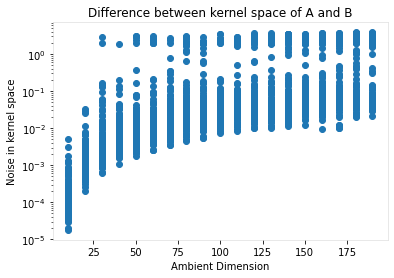

In [27]:
plt.scatter(m_vec, err_U_test)
plt.title("Difference between kernel space of A and B")
plt.xlabel("Ambient Dimension")
plt.ylabel("Noise in kernel space")
plt.yscale('log')
plt.show()

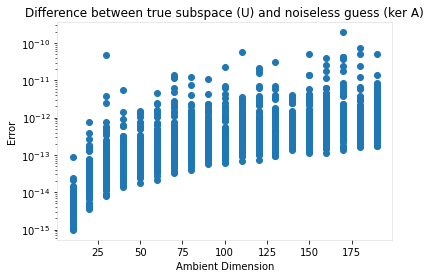

In [28]:
plt.scatter(m_vec, err_noiseless_test)
plt.title("Difference between true subspace (U) and noiseless guess (ker A)")
plt.xlabel("Ambient Dimension")
plt.ylabel("Error")
plt.yscale('log')
plt.show()

In [29]:
# Averaging results of each trial

avg_bounds = np.empty(np.int((upper_dim-lower_dim)/increment), dtype = 'float') #Stores average of results of each test
avg_error = np.empty(np.int((upper_dim-lower_dim)/increment), dtype = 'float') #Stores average of results of each test
avg_sigma = np.empty(np.int((upper_dim-lower_dim)/increment), dtype = 'float') #Stores average of results of each test
m_vec_distinct = np.empty(np.int((upper_dim-lower_dim)/increment), dtype = 'float') #Stores the distinct values of m

c=0

for i in range(np.int((upper_dim-lower_dim)/increment)):
    sum_bounds = 0
    sum_error = 0
    sum_sigma = 0

    for j in range(0,num_tests):
        sum_bounds = sum_bounds + bounds[(i*num_tests)+j]
        sum_error = sum_error + err_noisy_test[(i*num_tests)+j]
        sum_sigma = sum_sigma + Sig_B_vec[(i*num_tests)+j]
        
    avg_bounds[c] = sum_bounds/num_tests
    avg_error[c] = sum_error/num_tests
    avg_sigma[c] = sum_sigma/num_tests
    c+=1
    
c = 0
for i in range(lower_dim, upper_dim, increment):
    m_vec_distinct[c] = i
    c+=1

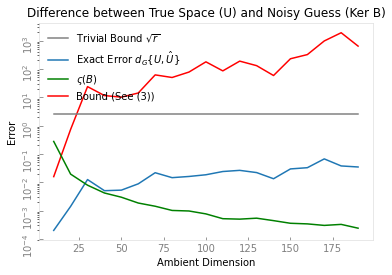

In [30]:
fig = plt.figure()

ax = fig.add_subplot()

# Creating Title

plt.title("Difference between True Space (U) and Noisy Guess (Ker B)")

# Adjusting Ticks

ax.tick_params(direction="in")
plt.yticks(rotation=90)
ax.tick_params(axis='x',direction="in", colors='gray')    #setting up X-axis tick color to red
ax.tick_params(axis='y',direction="in", colors='gray')

#Plotting Data

plt.plot(m_vec_distinct, avg_error, label = r'Exact Error $d_G\{U, \hat{U}\}$')
plt.plot(m_vec_distinct,avg_bounds,color = 'red', label = 'Bound (See (3))')
plt.plot(m_vec_distinct,avg_sigma, color = 'green', label = r'$\varsigma(B)$')
plt.plot(m_vec_distinct,np.full((np.int(num/num_tests),),np.sqrt(r),dtype = float), color = 'grey', label = r'Trivial Bound $\sqrt{r}$')

# Labeling and Scaling Axes

plt.xlabel(r'Ambient Dimension')
plt.ylabel("Error")
plt.yscale('log')

#Making Legend

# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()

    
# specify order
order = [3, 0, 2, 1]
  
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order], frameon = False)

# Adjusting Borders

plt.rcParams["axes.edgecolor"] = "lightgray"  #Border color
plt.rcParams["axes.linewidth"] = 0.50      #Border Width

# Saving Figure
#plt.savefig('Ambient_Dim_Sampling_2.eps', format='eps')

plt.show()



## Experiment 3: Increasing subspace dimension r, keeping noise level and ambient dimension constant

In [38]:
lower_dim = 5
upper_dim = 50
num_tests = 100 #Number of tests per dimension
increment = 5 #Increment of dimension (Make sure it divides upper_dim - nower_dim)
num = np.int((upper_dim-lower_dim)/increment)*num_tests

m = 50 # Ambient Dimension
sigma = 1e-5 #Noise level / standard deviation of noise


r_vec = np.empty(num, dtype = 'int')
c=0
for i in range(lower_dim,upper_dim,increment):
    for j in range(0,num_tests):
        r_vec[c] = i
        c+=1

In [39]:
err_A = np.empty(num, dtype = float) #Stores error in kernel spaces for each experiment (no noise vs noise)
err_U_test = np.empty(num, dtype = float) #Stores error in kernel spaces of A, i.e. errors in 'guesses' (no noise vs noise)
err_noiseless_test = np.empty(num, dtype = float) #Stores error in the difference between true projection and no noise guess
err_noisy_test = np.empty(num, dtype = float) # Stores error in difference between true projection and noise guess
bounds = np.empty(num, dtype = float) #Stores the error bounds for each experiment (Old)
delta_vec = np.empty(num, dtype = float) #Stores the values of delta (i.e. min singular value of projection)
Sig_B_vec = np.empty(num, dtype = float) #Stores the singular values of B for each experiment

c = 0

for r_ in r_vec:
    U = np.random.normal(0, 1, (m,r_))
    
    W = np.zeros((m,m-r_))

    #Uncomment for the first type of W matrix
    
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            if i < r_:
                W[i][j] = 1
            else:
                if i-r_ == j:
                    W[i][j] = 1
    """
    #Uncomment for the second type of W matrix
    
    for i in range(W.shape[1]):
        temp = 0
        while temp!=r_+1:
            W[temp+i][i] = 1
            temp+=1
    """
   
    err_A[c], err_U_test[c], err_noiseless_test[c], err_noisy_test[c], bounds[c], delta_vec[c], Sig_B_vec[c] = Errors(m,r_,U,W,sigma)
    c+=1

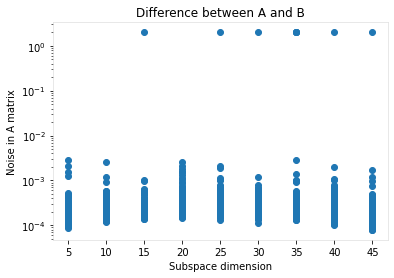

In [40]:
plt.scatter(r_vec,err_A)
plt.title("Difference between A and B")
plt.xlabel("Subspace dimension")
plt.ylabel("Noise in A matrix")
plt.yscale('log')
plt.show()

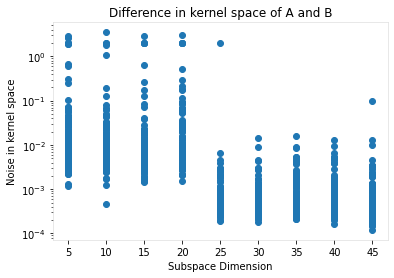

In [41]:
plt.scatter(r_vec, err_U_test)
plt.title("Difference in kernel space of A and B")
plt.xlabel("Subspace Dimension")
plt.ylabel("Noise in kernel space")
plt.yscale('log')
plt.show()

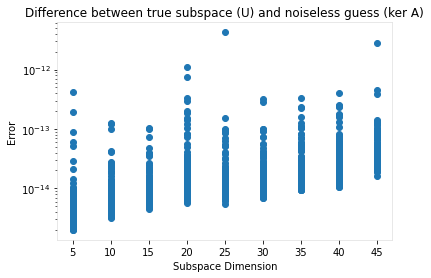

In [42]:
plt.scatter(r_vec, err_noiseless_test)
plt.title("Difference between true subspace (U) and noiseless guess (ker A)")
plt.xlabel("Subspace Dimension")
plt.ylabel("Error")
plt.yscale('log')
plt.show()

In [43]:
# Averaging results of each trial

avg_bounds = np.empty(np.int((upper_dim-lower_dim)/increment), dtype = 'float') #Stores average of results of each test
avg_error = np.empty(np.int((upper_dim-lower_dim)/increment), dtype = 'float') #Stores average of results of each test
avg_sigma = np.empty(np.int((upper_dim-lower_dim)/increment), dtype = 'float') #Stores average of results of each test
r_vec_distinct = np.empty(np.int((upper_dim-lower_dim)/increment), dtype = 'float') #Stores the distinct values of r

c=0

for i in range(np.int((upper_dim-lower_dim)/increment)):
    sum_bounds = 0
    sum_error = 0
    sum_sigma = 0

    for j in range(0,num_tests):
        sum_bounds = sum_bounds + bounds[(i*num_tests)+j]
        sum_error = sum_error + err_noisy_test[(i*num_tests)+j]
        sum_sigma = sum_sigma + Sig_B_vec[(i*num_tests)+j]
        
    avg_bounds[c] = sum_bounds/num_tests
    avg_error[c] = sum_error/num_tests
    avg_sigma[c] = sum_sigma/num_tests
    c+=1
    
c = 0
for i in range(lower_dim, upper_dim, increment):
    r_vec_distinct[c] = i
    c+=1

In [44]:
root_r_vec = np.empty(np.int((upper_dim-lower_dim)/increment), dtype = 'float')

for i in range(np.int((upper_dim-lower_dim)/increment)):
    root_r_vec[i] = math.sqrt(r_vec_distinct[i])

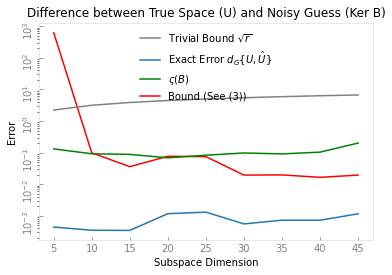

In [45]:
fig = plt.figure()

ax = fig.add_subplot()

# Creating Title

plt.title("Difference between True Space (U) and Noisy Guess (Ker B)")

# Adjusting Ticks

ax.tick_params(direction="in")
plt.yticks(rotation=90)
ax.tick_params(axis='x',direction="in", colors='gray')    #setting up X-axis tick color to red
ax.tick_params(axis='y',direction="in", colors='gray')

#Plotting Data

plt.plot(r_vec_distinct, avg_error, label = r'Exact Error $d_G\{U, \hat{U}\}$')
plt.plot(r_vec_distinct,avg_bounds,color = 'red', label = 'Bound (See (3))')
plt.plot(r_vec_distinct,avg_sigma, color = 'green', label = r'$\varsigma(B)$')
plt.plot(r_vec_distinct,root_r_vec, color = 'grey', label = r'Trivial Bound $\sqrt{r}$')

# Labeling and Scaling Axes
plt.xlabel(r'Subspace Dimension')
plt.ylabel("Error")
plt.yscale('log')

# Making Legend

# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()

    
# specify order
order = [3, 0, 2, 1]
  
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order], frameon = False)

# Adjusting Borders

plt.rcParams["axes.edgecolor"] = "lightgray"  #Border color
plt.rcParams["axes.linewidth"] = 0.50      #Border Width

# Saving Figure
#plt.savefig('Subspace_Dim_Sampling_2.eps', format='eps')

plt.show()



## Some extra analysis

### PCA for Effect of Noise Experiment

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(np.vstack((sigma_vec, err_noisy_test)).T)

PCA(n_components=2)

In [54]:
pca.components_

array([[ 0.17069498,  0.98532392],
       [ 0.98532392, -0.17069498]])

In [55]:
pca.explained_variance_

array([9.87188034e-05, 2.70251658e-07])

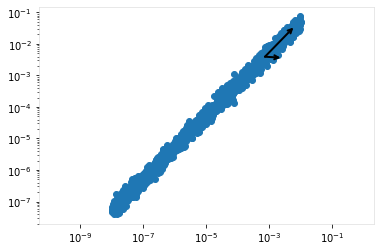

In [58]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(sigma_vec, err_noisy_test)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.xscale('log')
plt.yscale('log')
plt.axis('equal');